In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# only need to change start and end date
start = '2020-01-10'
end = '2020-01-16'
stmt_type = 'key_statistics'

In [3]:
start = start.split('-')
end = end.split('-')

to_int = lambda x: int(x)
start = list(map(to_int,start))
end = list(map(to_int,end))

# get difference in days
diff_days = dt.date(int(end[0]),int(end[1]),int(end[2]))-dt.date(int(start[0]),int(start[1]),int(start[2]))
diff_days = diff_days.days

# get list of days 
date_list = [dt.date(int(end[0]),int(end[1]),int(end[2])) - dt.timedelta(days=x) for x in range(diff_days+1)]
date_list = sorted(list(map(str,date_list)))

In [4]:
main_df = pd.DataFrame()

# read csv file iteratively 
for date in date_list:
    try:
        df = pd.read_csv('~/Documents/MOYI_Project/Minerva-DataExtractor/sp500_{}_dfs/{}_{}.csv'.format(stmt_type,date,stmt_type))
    except:
        continue

    df['Date'] = date
    main_df = pd.concat([main_df,df],axis=0,sort=False)

main_df.rename(columns={'Unnamed: 0':'key_statistics'},inplace=True)
main_df.set_index(['Date','key_statistics'],inplace=True)
main_df.sort_index(level=['Date','key_statistics'],inplace=True)

In [5]:
main_df.head()

MMM         ABT        ABBV  \
Date       key_statistics                                                  
2020-01-10 52WeekChange              -0.06404966  0.25130284  0.02278912   
           SandP52WeekChange          0.26112986  0.26112986  0.26112986   
           annualHoldingsTurnover            NaN         NaN         NaN   
           annualReportExpenseRatio          NaN         NaN         NaN   
           beta                         1.101449    1.107416    0.947144   

                                           ABMD         ACN        ATVI  \
Date       key_statistics                                                 
2020-01-10 52WeekChange              -0.4521529   0.4021901  0.15559888   
           SandP52WeekChange         0.26112986  0.26112986  0.26112986   
           annualHoldingsTurnover           NaN         NaN         NaN   
           annualReportExpenseRatio         NaN         NaN         NaN   
           beta                        0.274509    1.040068    0.836317   

                                           ADBE         AMD          AAP  \
Date       key_statistics                                                  
2020-01-10 52WeekChange               0.4318459   1.4807498  -0.07390809   
           SandP52WeekChange         0.26112986  0.26112986   0.26112986   
           annualHoldingsTurnover           NaN         NaN          NaN   
           annualReportExpenseRatio         NaN         NaN          NaN   
           beta                        1.105711    3.092924     0.832907   

                                            AES  ...        WYNN         XEL  \
Date       key_statistics                        ...                           
2020-01-10 52WeekChange               0.3207301  ...   0.2760322   0.2693323   
           SandP52WeekChange         0.26112986  ...  0.26112986  0.26112986   
           annualHoldingsTurnover           NaN  ...         NaN         NaN   
           annualReportExpenseRatio         NaN  ...         NaN         NaN   
           beta                        1.082693  ...    2.085251    0.097186   

                                            XRX        XLNX         XYL  \
Date       key_statistics                                                 
2020-01-10 52WeekChange               0.6523702  0.12327099  0.16282094   
           SandP52WeekChange         0.26112986  0.26112986  0.26112986   
           annualHoldingsTurnover           NaN         NaN         NaN   
           annualReportExpenseRatio         NaN         NaN         NaN   
           beta                        1.794266    1.219948    1.157715   

                                            YUM        ZBRA         ZBH  \
Date       key_statistics                                                 
2020-01-10 52WeekChange              0.12169075   0.5372622   0.4327035   
           SandP52WeekChange         0.26112986  0.26112986  0.26112986   
           annualHoldingsTurnover           NaN         NaN         NaN   
           annualReportExpenseRatio         NaN         NaN         NaN   
           beta                        0.335038     1.65177    1.155157   

                                           ZION         ZTS  
Date       key_statistics                                    
2020-01-10 52WeekChange              0.17915905   0.5722933  
           SandP52WeekChange         0.26112986  0.26112986  
           annualHoldingsTurnover           NaN         NaN  
           annualReportExpenseRatio         NaN         NaN  
           beta                        1.577152    0.799658  

[5 rows x 504 columns]

In [6]:
# drop rows with all nans
main_df.dropna(how='all',axis=0,inplace=True)

In [7]:
# get single metrics of all 505 stocks
# only numeric data
def get_mean(num):
    return 
def metric(main_df, column, date_list):
    df = pd.DataFrame()
    for date in date_list:
        try: 
            data = main_df.loc[(date, column)].astype('float64')
            df = pd.concat([df, data],axis=1,sort=False)
        except:
            continue
    return df

In [8]:
# get 52WeekChange
fifty_two_WeekChange = metric(main_df,'52WeekChange',date_list).replace(np.inf,np.nan).dropna(how='all')

# top 10 in average earningsQuarterlyGrowth
top_20_avg_fifty_two_WeekChange = fifty_two_WeekChange.mean(axis=1).sort_values(ascending=False).iloc[0:20]
top_20_fifty_two_WeekChange = fifty_two_WeekChange.loc[top_20_avg_fifty_two_WeekChange.index]
print('Top 20 52WeekChange:',list(top_20_fifty_two_WeekChange.index))

Top 20 52WeekChange: ['AMD', 'LRCX', 'AAPL', 'CPRT', 'KLAC', 'QRVO', 'LDOS', 'WDC', 'AMAT', 'CDW', 'TGT', 'SWKS', 'TDG', 'CHTR', 'EL', 'MKTX', 'GPN', 'MSCI', 'ANSS', 'CMG']


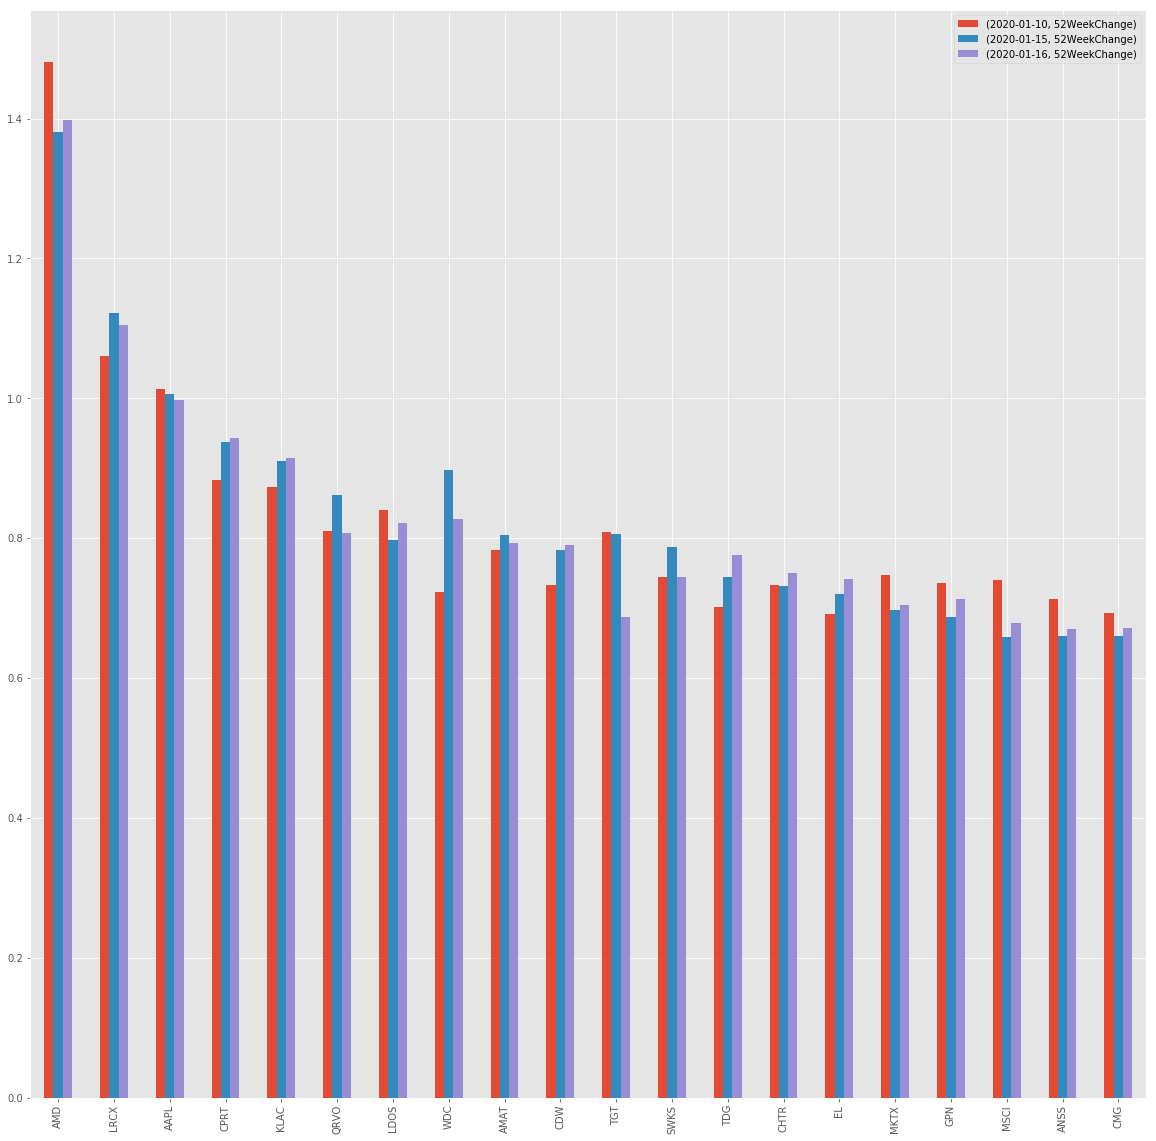

In [9]:
# plot historical 52weekchange of first 20 stocks
plt.style.use('ggplot')
top_20_fifty_two_WeekChange.plot(kind='bar',figsize=(20,20))
plt.show()

In [10]:
# get earningsQuarterlyGrowth
earningsQuarterlyGrowth = metric(main_df,'earningsQuarterlyGrowth',date_list)

# top 10 in average earningsQuarterlyGrowth
top_20_avg_earningsQuarterlyGrowth = earningsQuarterlyGrowth.mean(axis=1).sort_values(ascending=False).iloc[0:20]
top_20_earningsQuarterlyGrowth = earningsQuarterlyGrowth.loc[top_20_avg_earningsQuarterlyGrowth.index]
print('Top 20 earningsQuarterlyGrowth:',list(top_20_earningsQuarterlyGrowth.index))

Top 20 earningsQuarterlyGrowth: ['HP', 'WELL', 'CNC', 'NOW', 'INCY', 'BKR', 'DRE', 'TFX', 'IT', 'EA', 'XRAY', 'TTWO', 'SRE', 'ZBH', 'QRVO', 'CMG', 'XRX', 'FLS', 'MET', 'FANG']


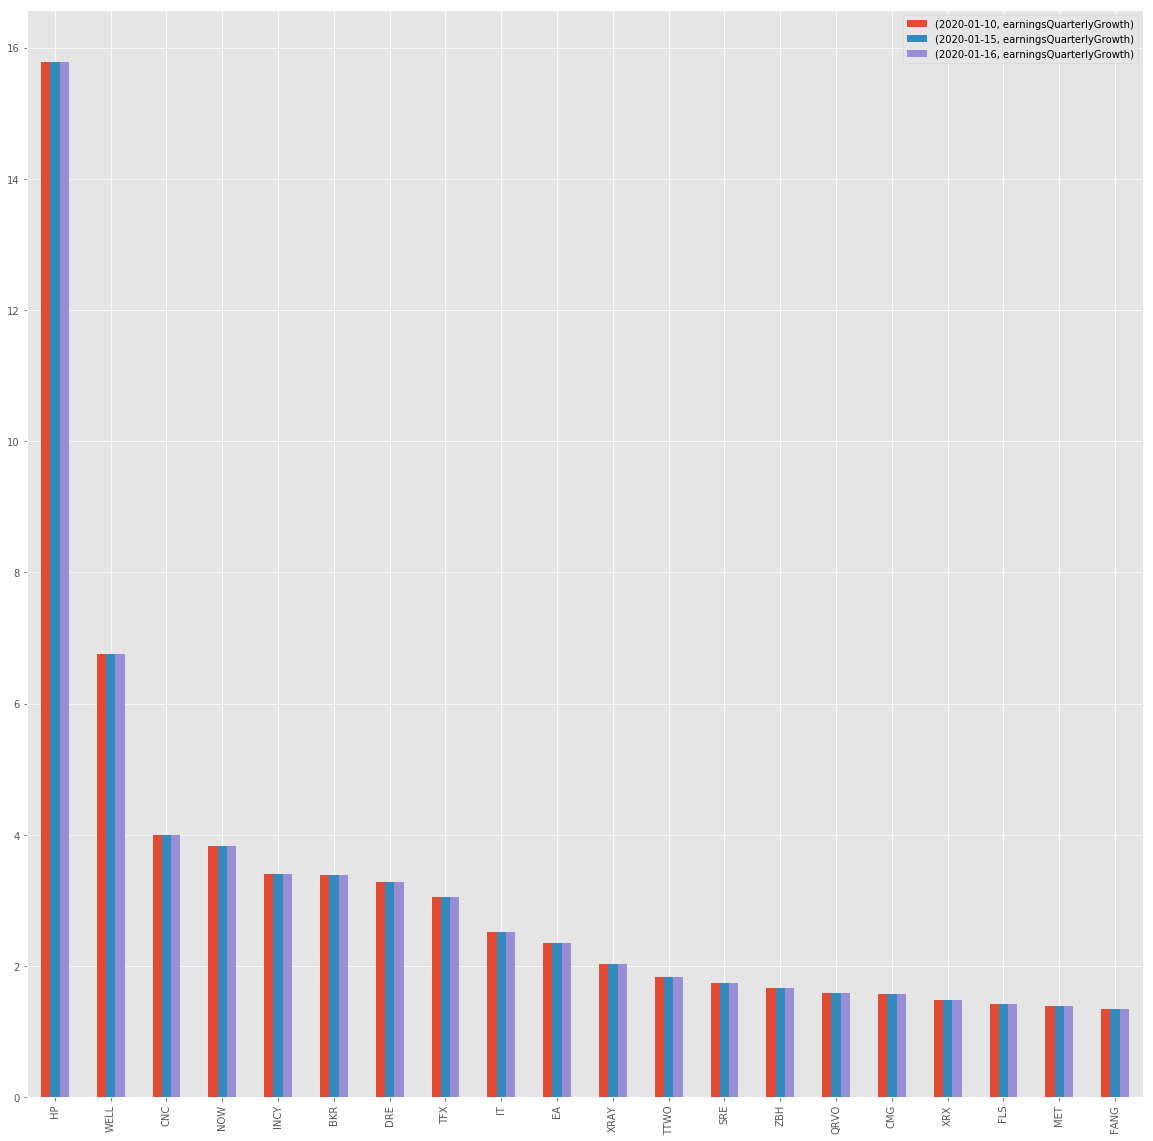

In [11]:
# plot historical earningsQuarterlyGrowth of top 10 averages
plt.style.use('ggplot')
top_20_earningsQuarterlyGrowth.plot(kind='bar',figsize=(20,20))
plt.show()

In [12]:
# get beta
beta = metric(main_df,'beta',date_list)

# top 20 in average beta
top_20_avg_beta = beta.mean(axis=1).sort_values(ascending=False).iloc[0:20]
top_20_beta = beta.loc[top_20_avg_beta.index]
print('Top 20 beta:',list(top_20_beta.index))

Top 20 beta: ['AMD', 'URI', 'FCX', 'DVN', 'MRO', 'SIVB', 'IPGP', 'DXC', 'WYNN', 'ALGN', 'NVDA', 'ARNC', 'HES', 'APTV', 'LNC', 'MU', 'APA', 'WDC', 'ADSK', 'BWA']


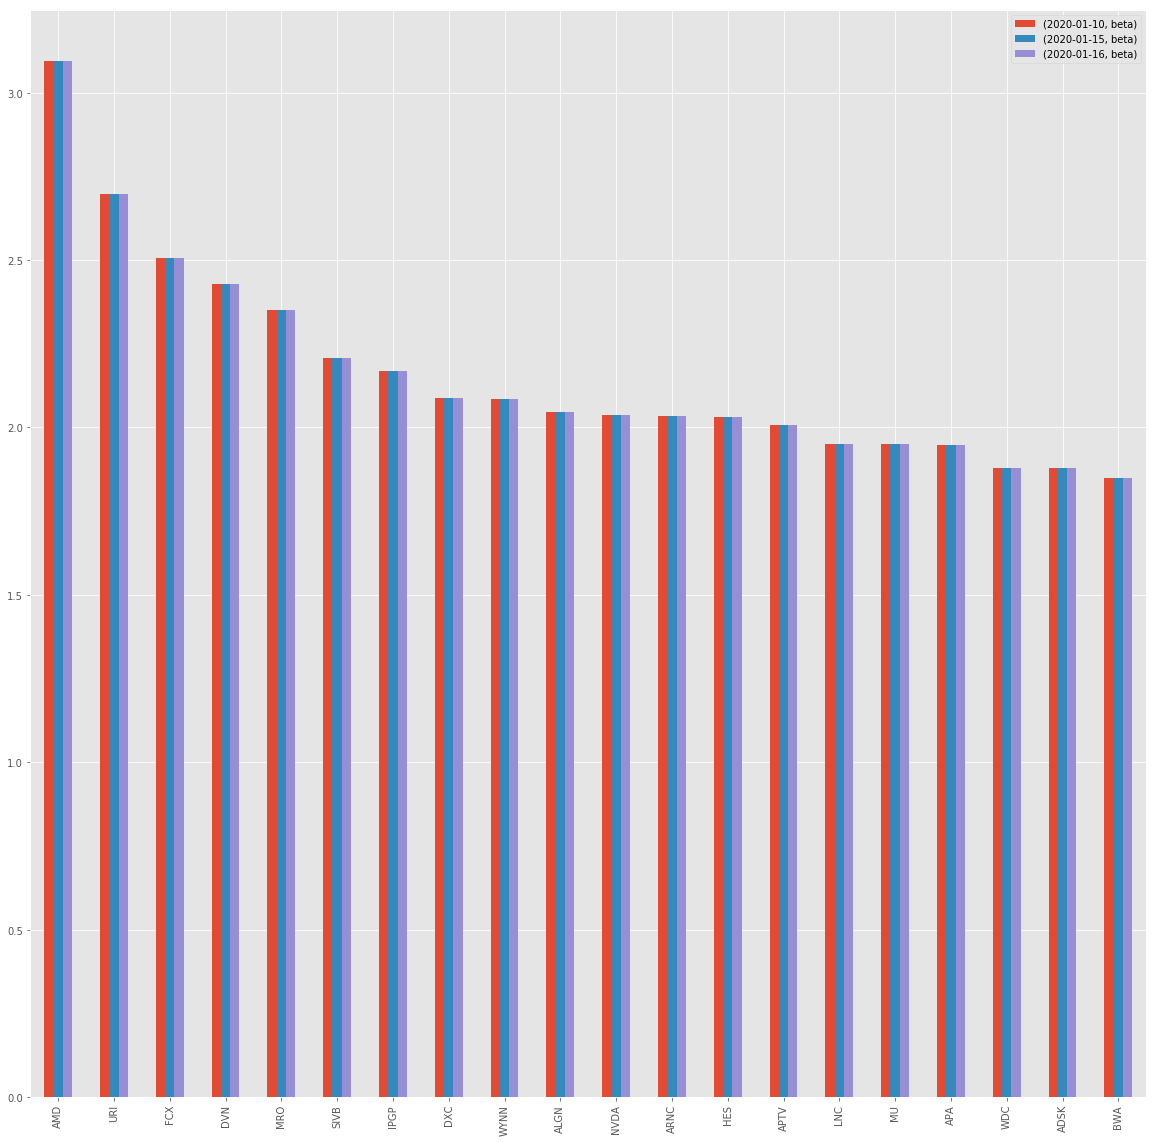

In [13]:
# plot historical beta of first 20 stocks
plt.style.use('ggplot')
top_20_beta.plot(kind='bar',figsize=(20,20))
plt.show()

In [14]:
print('Top 20 52WeekChange:',list(top_20_fifty_two_WeekChange.index),'\n')
print('Top 20 earningsQuarterlyGrowth:',list(top_20_earningsQuarterlyGrowth.index),'\n')
print('Top 20 beta:',list(top_20_beta.index),'\n')

Top 20 52WeekChange: ['AMD', 'LRCX', 'AAPL', 'CPRT', 'KLAC', 'QRVO', 'LDOS', 'WDC', 'AMAT', 'CDW', 'TGT', 'SWKS', 'TDG', 'CHTR', 'EL', 'MKTX', 'GPN', 'MSCI', 'ANSS', 'CMG'] 

Top 20 earningsQuarterlyGrowth: ['HP', 'WELL', 'CNC', 'NOW', 'INCY', 'BKR', 'DRE', 'TFX', 'IT', 'EA', 'XRAY', 'TTWO', 'SRE', 'ZBH', 'QRVO', 'CMG', 'XRX', 'FLS', 'MET', 'FANG'] 

Top 20 beta: ['AMD', 'URI', 'FCX', 'DVN', 'MRO', 'SIVB', 'IPGP', 'DXC', 'WYNN', 'ALGN', 'NVDA', 'ARNC', 'HES', 'APTV', 'LNC', 'MU', 'APA', 'WDC', 'ADSK', 'BWA'] 



In [15]:
all_three = [x for x in list(top_20_fifty_two_WeekChange.index) if x in list(top_20_earningsQuarterlyGrowth.index) and x in list(top_20_beta.index)]
print('Top stocks in all three top lists: ', all_three) 

Top stocks in all three top lists:  []


In [16]:
both_weekchange_earningrowth = [x for x in list(top_20_fifty_two_WeekChange.index) if x in list(top_20_earningsQuarterlyGrowth.index)]
print('Top stocks in both top 52WeekChange and earningsQuarterlyGrowth lists: ', both_weekchange_earningrowth) 

Top stocks in both top 52WeekChange and earningsQuarterlyGrowth lists:  ['QRVO', 'CMG']


In [17]:
both_weekchange_beta = [x for x in list(top_20_fifty_two_WeekChange.index) if x in list(top_20_beta.index)]
print('Top stocks in both top 52WeekChange and beta lists: ', both_weekchange_beta) 

Top stocks in both top 52WeekChange and beta lists:  ['AMD', 'WDC']


In [18]:
both_earningrowth_beta = [x for x in list(top_20_earningsQuarterlyGrowth.index) if x in list(top_20_beta.index)]
print('Top stocks in both top earningGrowth and beta lists: ', both_earningrowth_beta) 

Top stocks in both top earningGrowth and beta lists:  []


# Thus, there are four stocks worth considering to invest [AMD, QRVO, CMG, WDC].